First five rows of the dataset:
   Color    Size   Fruit  Color_LabelEncoded  Size_LabelEncoded  \
0   Blue   Small  Orange                   0                  2   
1   Blue   Small  Banana                   0                  2   
2  Green   Large   Apple                   1                  0   
3   Blue  Medium   Apple                   0                  1   
4   Blue   Large  Banana                   0                  0   

   Fruit_LabelEncoded  
0                   2  
1                   1  
2                   0  
3                   0  
4                   1  

Value counts for Color:
Color
Blue     41
Red      32
Green    27
Name: count, dtype: int64

Value counts for Size:
Size
Small     39
Large     32
Medium    29
Name: count, dtype: int64

Value counts for Fruit:
Fruit
Apple     41
Banana    31
Orange    28
Name: count, dtype: int64


<ipython-input-5-fc6f0ff42b73>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")
<ipython-input-5-fc6f0ff42b73>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")
<ipython-input-5-fc6f0ff42b73>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")


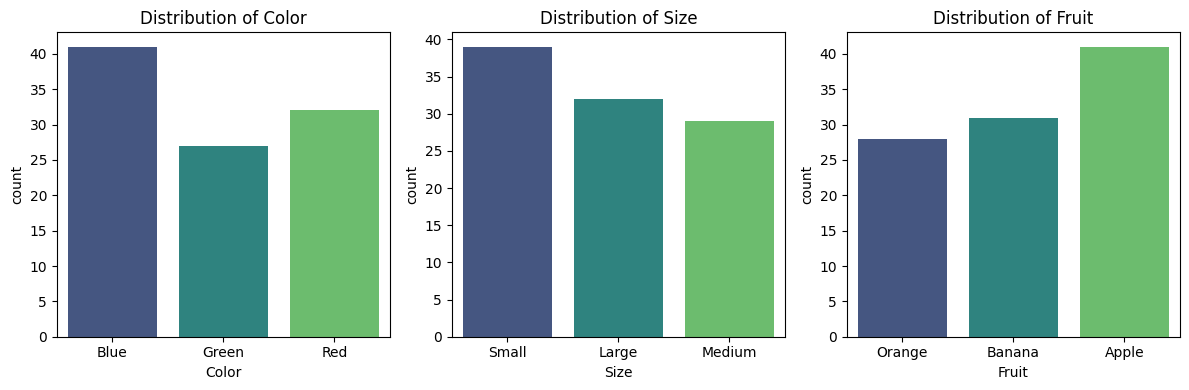


Label Encoded Dataset:
   Color    Size   Fruit  Color_LabelEncoded  Size_LabelEncoded  \
0   Blue   Small  Orange                   0                  2   
1   Blue   Small  Banana                   0                  2   
2  Green   Large   Apple                   1                  0   
3   Blue  Medium   Apple                   0                  1   
4   Blue   Large  Banana                   0                  0   

   Fruit_LabelEncoded  Color_Encoded  Size_Encoded  Fruit_Encoded  
0                   2              0             2              2  
1                   1              0             2              1  
2                   0              1             0              0  
3                   0              0             1              0  
4                   1              0             0              1  

One-Hot Encoded Dataset:
   Color_LabelEncoded  Size_LabelEncoded  Fruit_LabelEncoded  Color_Blue  \
0                   0                  2                   2   

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load the dataset
file_path = "Day_41 Encoding_Methods_Data.csv"
df = pd.read_csv(file_path)

# Display the first five rows
print("First five rows of the dataset:")
print(df.head())

# Count occurrences of each unique value in categorical columns
categorical_columns = ["Color", "Size", "Fruit"]
for col in categorical_columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())

# Plot category distributions
plt.figure(figsize=(12, 4))
for i, col in enumerate(categorical_columns):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=df[col], palette="viridis")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Apply Label Encoding
label_encoders = {}
encoded_df = df.copy()
for col in categorical_columns:
    le = LabelEncoder()
    encoded_df[col + "_Encoded"] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for reference

print("\nLabel Encoded Dataset:")
print(encoded_df.head())

# Apply One-Hot Encoding
onehot_encoder = OneHotEncoder(sparse_output=False, drop=None)
ohe_encoded = onehot_encoder.fit_transform(df[categorical_columns])

# Create a DataFrame with OHE column names
ohe_columns = onehot_encoder.get_feature_names_out(categorical_columns)
ohe_df = pd.DataFrame(ohe_encoded, columns=ohe_columns)

# Concatenate with original dataset (excluding original categorical columns)
ohe_encoded_df = pd.concat([df.drop(columns=categorical_columns), ohe_df], axis=1)

print("\nOne-Hot Encoded Dataset:")
print(ohe_encoded_df.head())

# Compare the number of features before and after encoding
original_features = len(df.columns)
label_encoded_features = len(encoded_df.columns)
one_hot_encoded_features = len(ohe_encoded_df.columns)

print(f"\nFeature count comparison:")
print(f"Original dataset: {original_features} features")
print(f"After Label Encoding: {label_encoded_features} features")
print(f"After One-Hot Encoding: {one_hot_encoded_features} features")
